In [3]:
%matplotlib inline

In [4]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import find_peaks_cwt
from scipy import signal, interpolate

## Import Image

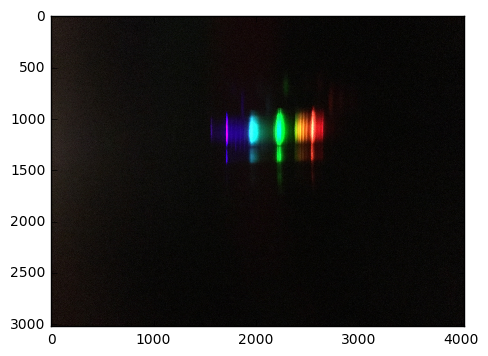

In [5]:
infile = 'data/bulb.JPG'
img = nd.imread(infile)

plt.imshow(img)

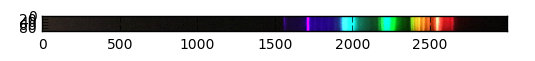

In [9]:
# take just a slice of the image.  If we sum on the columns, the 
# curve of the disc may create longer color lines.  Subsetting the
# image is a way to try and avoid this
plt.imshow(img[1100:1200,:3000,:])

In [10]:
# create 1d array for later use
img1d = img[1100:1200,:3000,:].mean(axis=0).mean(axis=1)

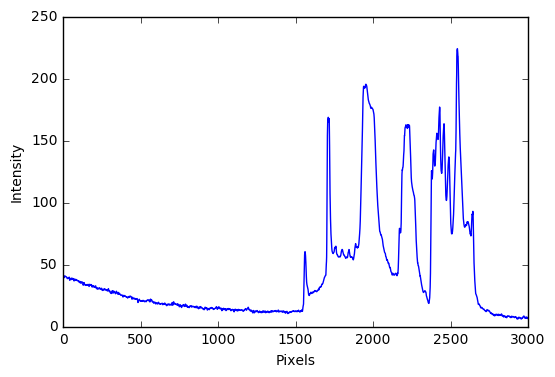

In [11]:
plt.plot(img1d)
plt.ylabel('Intensity')
plt.xlabel('Pixels')

In [12]:
# get the index of the highest peak for each color
x_red = img[900:1000,:,0].mean(axis=0).argmax()
x_green = img[900:1000,:,1].mean(axis=0).argmax()
x_blue = img[900:1000,:,2].mean(axis=0).argmax()
x_green2 = img[900:1000,1800:2000,1].mean(axis=0).argmax()+1800
x_blue2 = img[900:1000,1800:2000,2].mean(axis=0).argmax()+1800

In [13]:
x_green2

1956

In [14]:
x_blue2

1955

In [15]:
#So green and blue have the same peak in 1800-2000

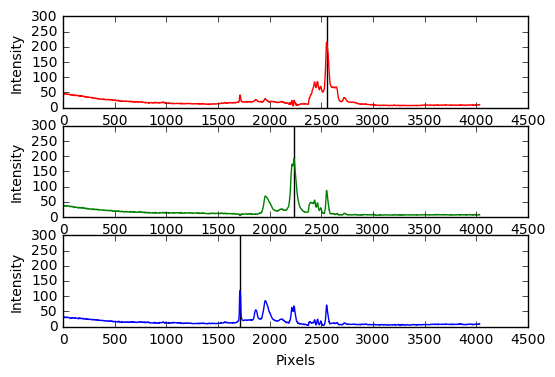

In [16]:
# average columns in each band
fig, ax = plt.subplots(3)
ax[0].plot(img[900:1000,:,0].mean(axis=0), color='red')
ax[0].vlines(x_red, 0,300)
ax[0].set_ylabel('Intensity')
ax[1].plot(img[900:1000,:,1].mean(axis=0), color='green')
ax[1].vlines(x_green, 0,300)
ax[1].set_ylabel('Intensity')
ax[2].plot(img[900:1000,:,2].mean(axis=0), color='blue')
ax[2].vlines(x_blue, 0,300)
ax[2].set_ylabel('Intensity')
plt.xlabel('Pixels')

In [17]:
# There are 5 peaks, but the 4th peak isn't clear enough, so I just choose 4 of them

In [18]:
x = np.array([x_blue, x_blue2, x_green, x_red], dtype=float)
print x

[ 1709.  1955.  2232.  2551.]


In [19]:
# we're fittig a polynomical regression
X = np.column_stack((x,x**2))
print X

[[  1.70900000e+03   2.92068100e+06]
 [  1.95500000e+03   3.82202500e+06]
 [  2.23200000e+03   4.98182400e+06]
 [  2.55100000e+03   6.50760100e+06]]


In [20]:
y = np.array([435.833, 491.607, 546.074, 614.95])
#y = np.array([435.833, 546.074])

In [21]:
# Fit and summarize OLS model
mod = sm.OLS(y,X)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.703e+04
Date:                Fri, 24 Mar 2017   Prob (F-statistic):           1.15e-05
Time:                        18:26:50   Log-Likelihood:                -7.9912
No. Observations:                   4   AIC:                             19.98
Df Residuals:                       2   BIC:                             18.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2839      0.004     66.703      0.0

/Users/Xianbo/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n))


In [22]:
beta = res.params
def calibrate(x):
    return beta[0]*x + (beta[1]*x**2)

calibrated_index = map(calibrate, np.arange(len(img1d)))

In [23]:
y

array([ 435.833,  491.607,  546.074,  614.95 ])

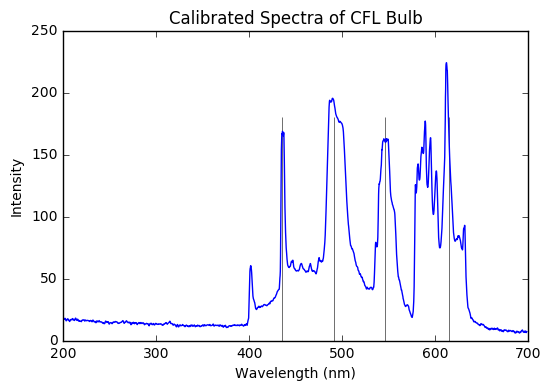

In [24]:
plt.plot(calibrated_index,img1d)
plt.xlim(200,700)
plt.vlines(y, 0, 180, lw=0.4)
plt.title('Calibrated Spectra of CFL Bulb')
plt.ylabel('Intensity')
plt.xlabel('Wavelength (nm)')